Note: follow the process in the order they apply on the notebook. ignore the numbers they are labeled, some cells were runned after restarting kernel

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
from scipy import stats
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.ensemble import RandomForestClassifier



In [58]:
#load dataset

df = pd.read_excel(r'C:\Users\HP\Downloads\Loan_Def.xlsx')

In [57]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
df1 = df.copy()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
df1 = df.drop_duplicates()


In [10]:
df1.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

There are no null values in the dataset. Duplicates have been dropped.

#EXPLORATORY DATA ANALYSIS

In [11]:
df1.describe(include='all')

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347,255347,255347,255347,255347,255347,255347,255347.000000
unique,255347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,3,2,2,5,2,NaN
top,I38PQUQS96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64366,64161,85302,127677,127742,51298,127701,NaN
mean,NaN,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116128
std,NaN,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320379
min,NaN,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Next  we are going to use z score for oulier detection. The Z-score (or standard score) is a statistical measure that tells you how far a data point is from the mean of a distribution, in terms of standard deviations. For this dataset, we will be taking any datapoint plus or minus three standard deviation from the mean as an outlier.

In [12]:
## Outlier detection

# Z-Score
from scipy.stats import zscore
z_scores = np.abs(zscore(df1[['LoanAmount']]))
outlier_z =df1[(z_scores > 3).any(axis=1)]
print(outlier_z)


Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []


In [13]:
# Z-Score

z_scores = np.abs(zscore(df1[['InterestRate']]))
outlier_I =df1[(z_scores > 3).any(axis=1)]
print(outlier_I)

z_scores = np.abs(zscore(df1[['LoanTerm']]))
outlier_L =df1[(z_scores > 3).any(axis=1)]
print(outlier_L)

Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []
Empty DataFrame
Columns: [LoanID, Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio, Education, EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner, Default]
Index: []


No detectable outlier in the dataset. From the describe table above, the loan amount and interest rate columns seem to have a few outliers but after check using the z score approach, there was no detectable outlier. 

Next, we will plot Histogram to understand the shape of the numerical features

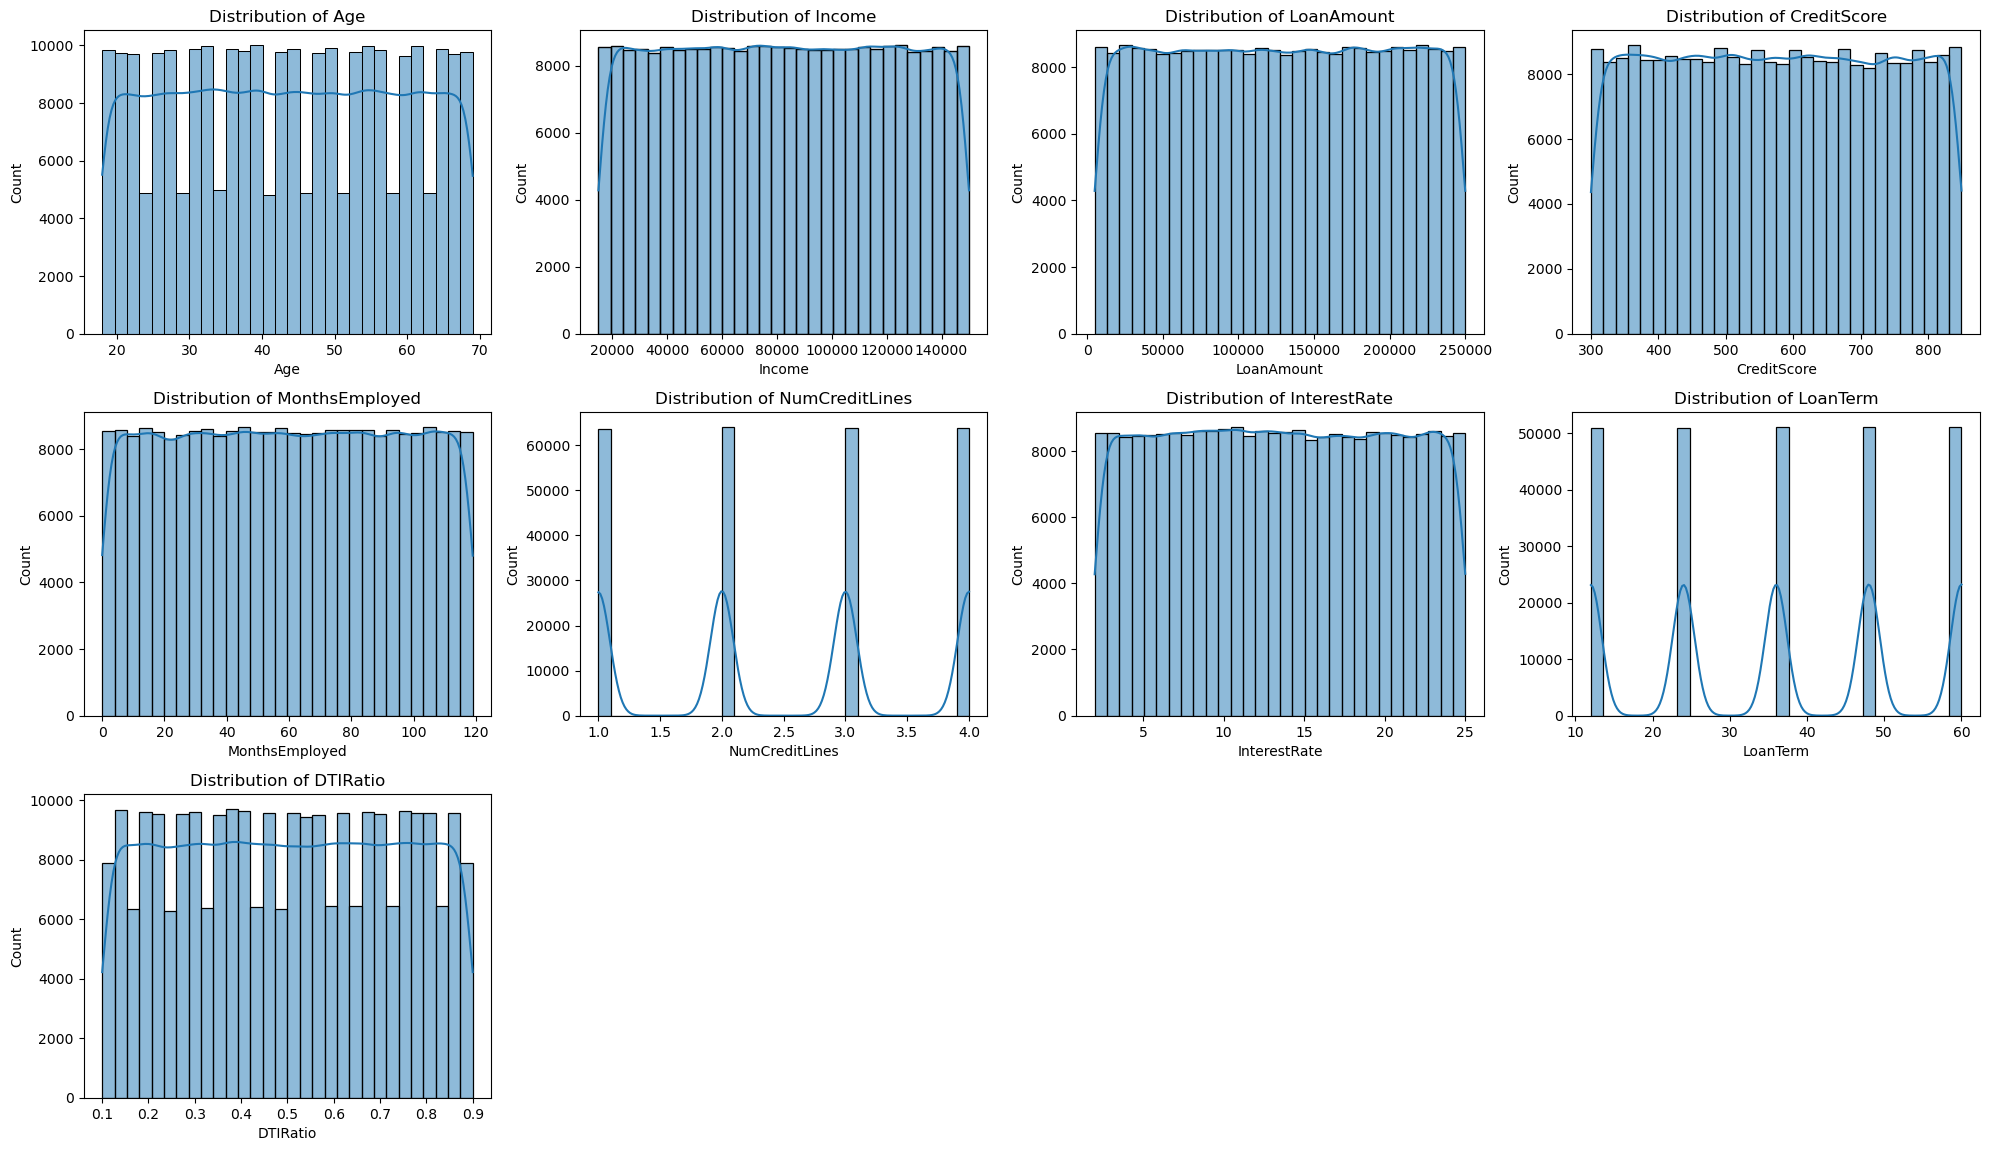

In [11]:
# Numerical features
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Default')  # Remove target variable

# Categorical features
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

# Plot distributions for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()



## Distribution of Key Loan Variables

The following histograms visualize the distribution of several variables in the loan dataset, helping to understand patterns and detect any anomalies:

1. **Age Distribution**  
   - Individuals range from ages 20 to 70.  
   - Most age groups show uniform representation (~8,000–10,000 per group).

2. **Income Distribution**  
   - Income ranges from $20,000 to $140,000.  
   - Distribution appears fairly even across brackets.

3. **Loan Amount Distribution**  
   - Loan amounts span from $0 to $250,000.  
   - Each bracket includes a similar count of individuals.

4. **Credit Score Distribution**  
   - Credit scores fall between 300 and 800.  
   - Uniform distribution with no major outliers.

5. **Months Employed Distribution**  
   - Employment duration ranges from 0 to 120 months.  
   - Even spread across durations with no sharp spikes.

6. **Number of Credit Lines**  
   - Ranges from 1.5 to 4.0 credit lines.  
   - Peaks observed at 2.0, 3.0, and 4.0—common values.

7. **Interest Rate Distribution**  
   - Interest rates range from 5% to 25%.  
   - Relatively uniform count across rate categories.

8. **Loan Term Distribution**  
   - Terms vary from 10 to 60 months.  
   - Distinct peaks at 20, 30, 40, 50, and 60 months.

9. **Debt-to-Income (DTI) Ratio Distribution**  
   - DTI ratios spread from 0.0 to 1.0.  
   - Most values appear evenly distributed, suggesting a balanced dataset.


Next, we will plot boxplots for the columns

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Education', order=df1['Education'].value_counts().index, palette='pastel')


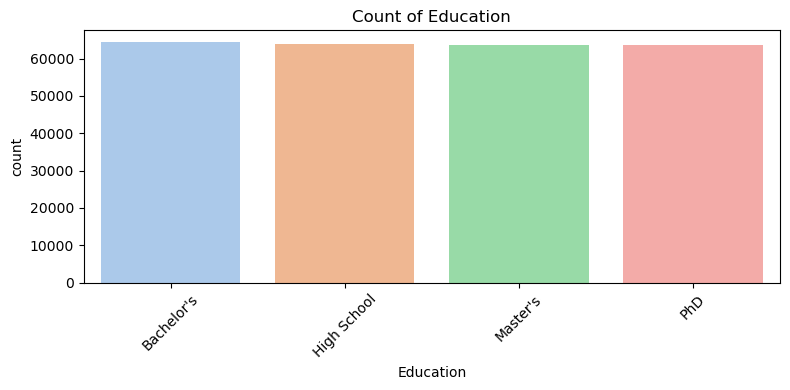

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='EmploymentType', order=df1['EmploymentType'].value_counts().index, palette='pastel')


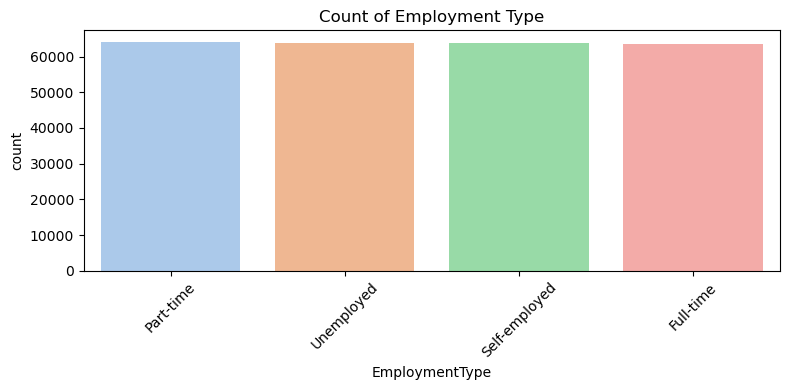

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='MaritalStatus', order=df1['MaritalStatus'].value_counts().index, palette='pastel')


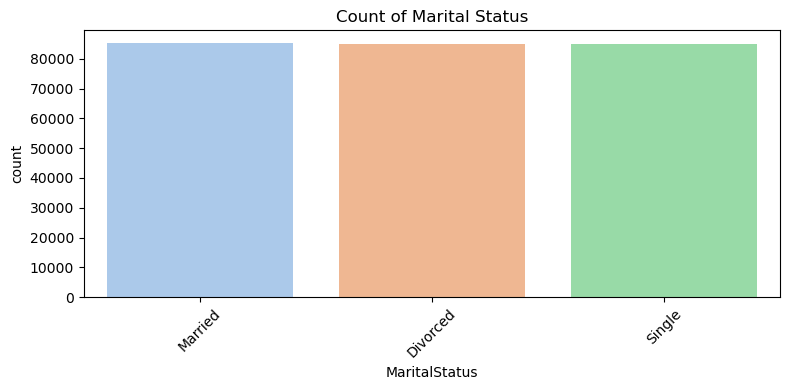

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='HasMortgage', order=df1['HasMortgage'].value_counts().index, palette='pastel')


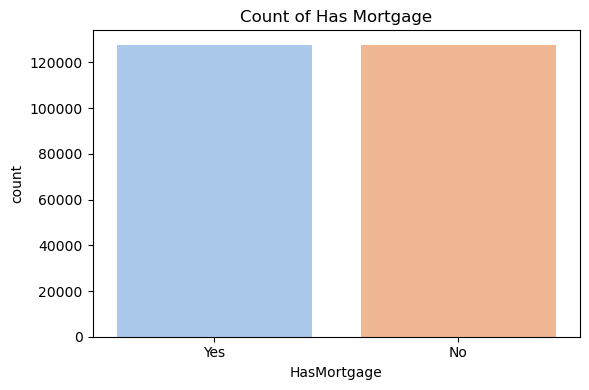

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='HasDependents', order=df1['HasDependents'].value_counts().index, palette='pastel')


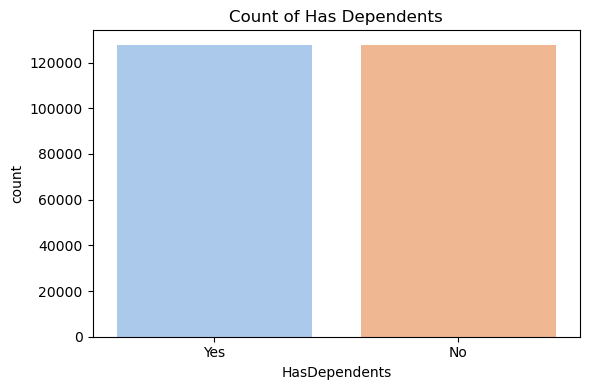

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='LoanPurpose', order=df1['LoanPurpose'].value_counts().index, palette='pastel')


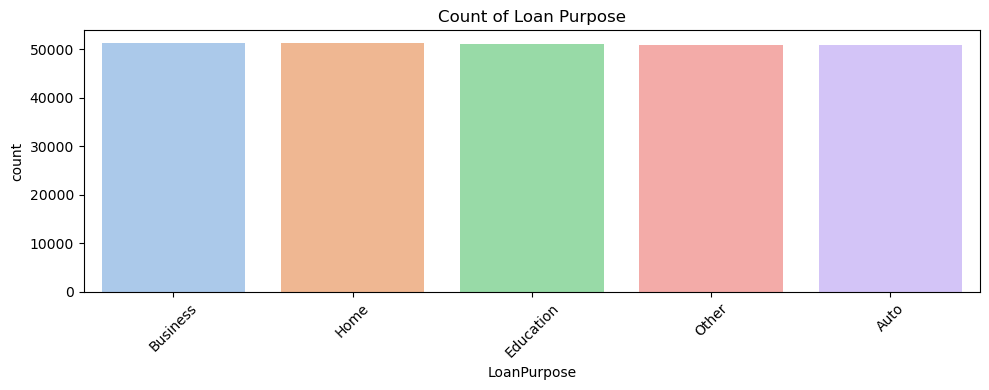

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\66788041.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='HasCoSigner', order=df1['HasCoSigner'].value_counts().index, palette='pastel')


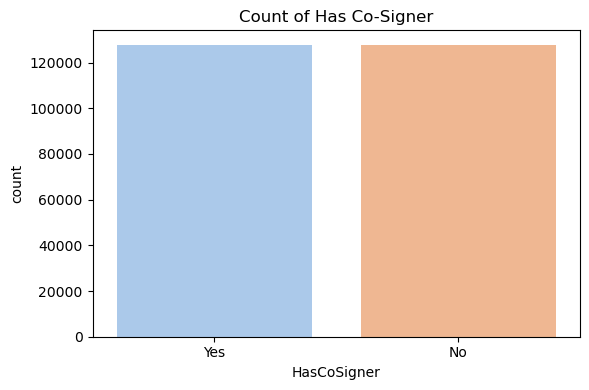

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='Education', order=df1['Education'].value_counts().index, palette='pastel')
plt.title('Count of Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='EmploymentType', order=df1['EmploymentType'].value_counts().index, palette='pastel')
plt.title('Count of Employment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df1, x='MaritalStatus', order=df1['MaritalStatus'].value_counts().index, palette='pastel')
plt.title('Count of Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='HasMortgage', order=df1['HasMortgage'].value_counts().index, palette='pastel')
plt.title('Count of Has Mortgage')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='HasDependents', order=df1['HasDependents'].value_counts().index, palette='pastel')
plt.title('Count of Has Dependents')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df1, x='LoanPurpose', order=df1['LoanPurpose'].value_counts().index, palette='pastel')
plt.title('Count of Loan Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='HasCoSigner', order=df1['HasCoSigner'].value_counts().index, palette='pastel')
plt.title('Count of Has Co-Signer')
plt.tight_layout()
plt.show(


C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


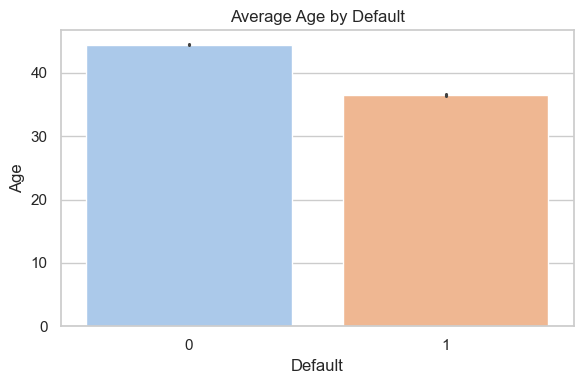

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


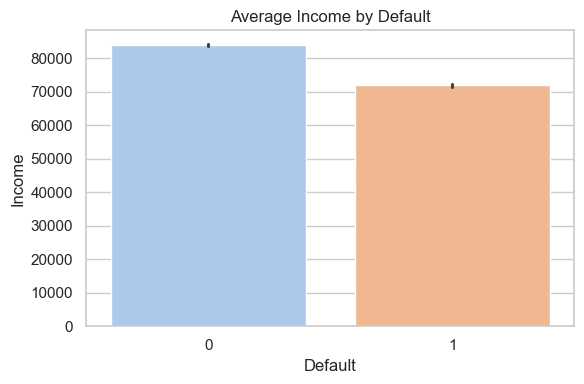

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


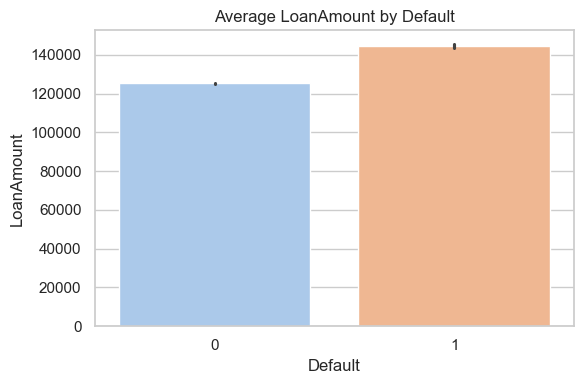

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


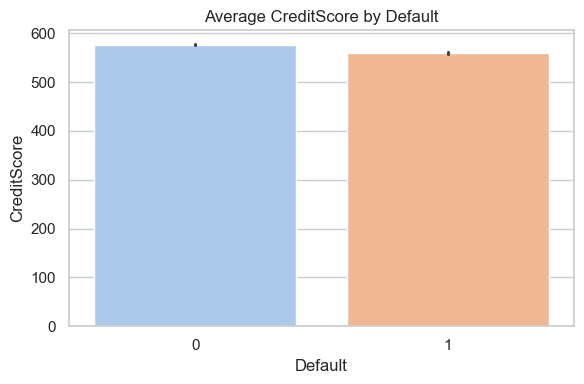

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


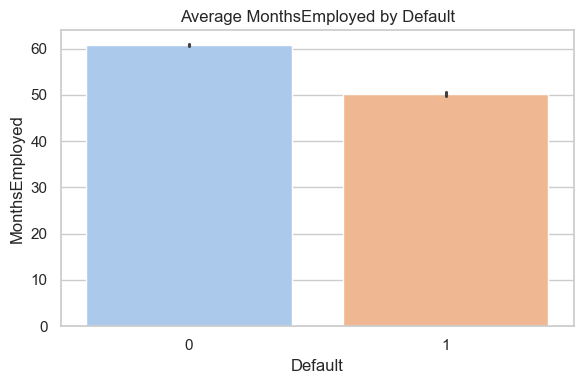

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


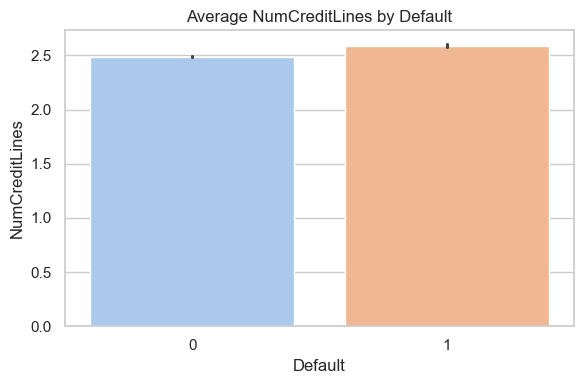

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


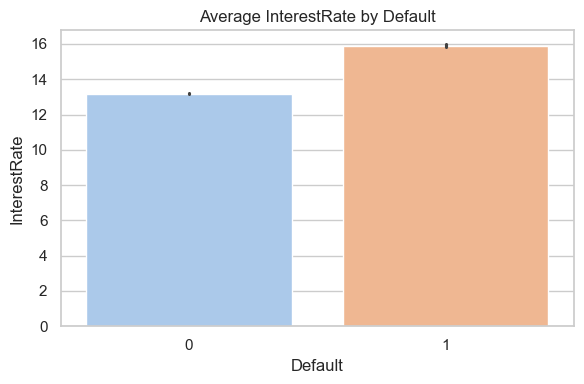

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


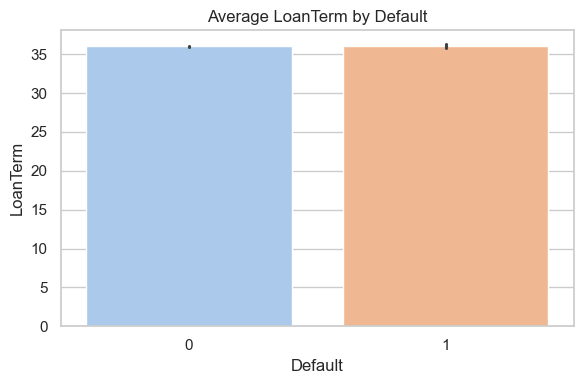

C:\Users\HP\AppData\Local\Temp\ipykernel_10708\3423987029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Default', y=col, palette='pastel')


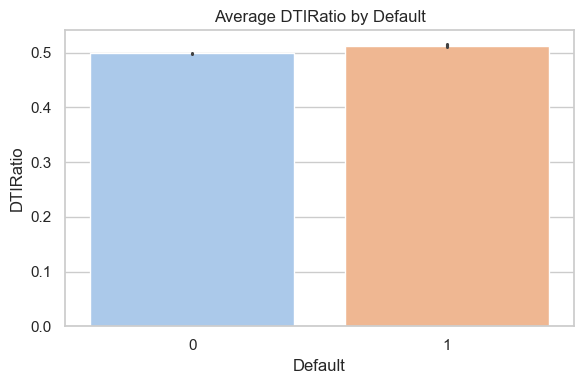

In [20]:

numeric_cols = df1.select_dtypes(include='number').columns.drop('Default')  # exclude target

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df1, x='Default', y=col, palette='pastel')
    plt.title(f'Average {col} by Default')
    plt.tight_layout()
    plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10708\4106630980.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Default', palette='pastel')


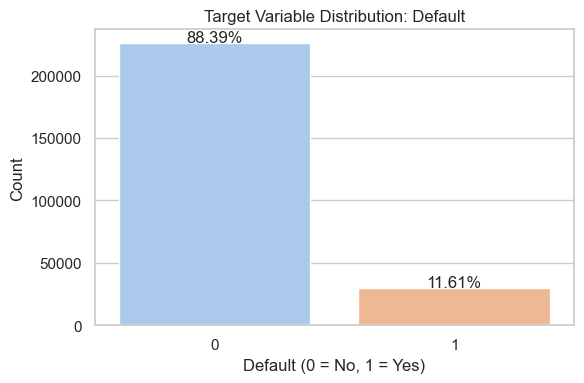


📊 Default Rate Summary (%):
 Default
0    88.39
1    11.61
Name: proportion, dtype: float64


In [23]:
#Target variable analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='Default', palette='pastel')
plt.title('Target Variable Distribution: Default')
total = len(df1)
for p in plt.gca().patches:
    count = p.get_height()
    percent = count / total * 100
    plt.gca().text(p.get_x() + p.get_width()/2, count + 1000, f'{percent:.2f}%', ha='center')
plt.ylabel("Count")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

# 2. Default Rate Summary
default_counts = df1['Default'].value_counts(normalize=True) * 100
print("\n📊 Default Rate Summary (%):\n", default_counts.round(2))



#There is a class imbalance, we are going to resample before building our models

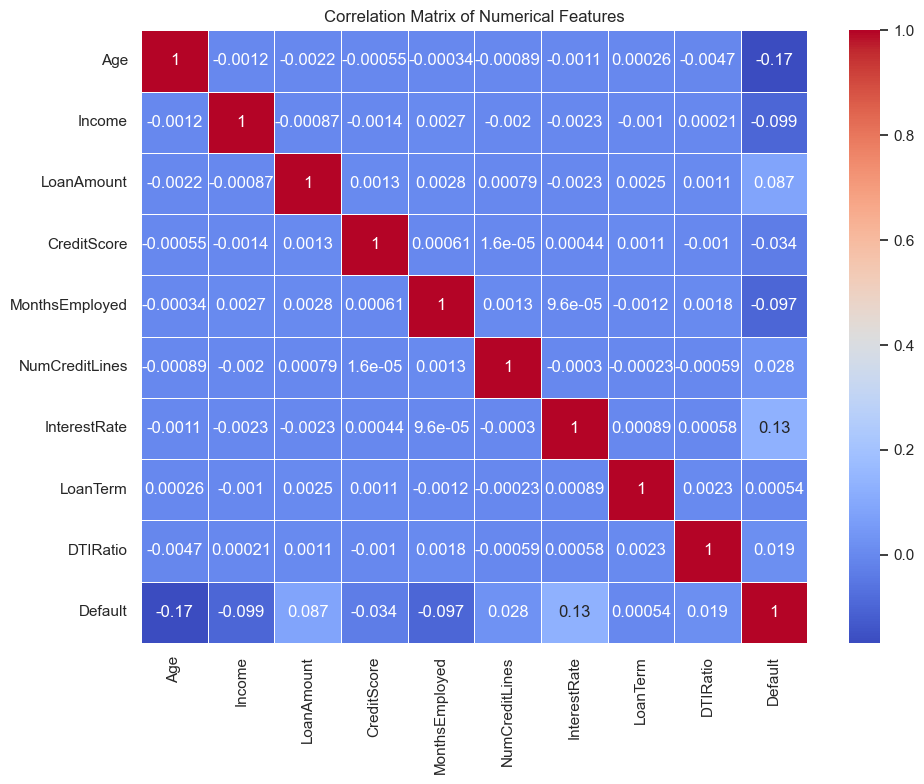

In [30]:
#correlation matrix

numeric_df = df1.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

Age has the strongest correlation with the default column. It has a moderate negative correlation: younger borrowers are more likely to default. Interest rate is most positively correlated with default. Higher rates → higher default probability. The bank should do more due diligence when borrowing at high interest rate
Loan amount has a slightly weak positive correlation while income has a slightly weak positive correlation
LoanTerm and DTIRatio has extremely weak correlation - almost zero

The feature coolumns have very weak correlation with themselves- almost zero

In [16]:
df2 = df1.copy()


## FEATURE ENGINEERING

# We are going to engineer the following features

1. Total repayment: The total amount to be repaid by the borrower, assuming simple interest
2. Debt service ratio: The Debt Service Ratio (DSR) is a measure of a borrower's ability to repay debt based on their income. 
It tells you how much of the borrower’s income is being used to pay back loans. In Nigeria, debt service ratio should be a maximum of 40%. it is calculated as DSR= 
 Monthly Income /Monthly Debt Payment (EMI)
3. Monthly installment (assuming equal repayment)
4. Educational Level: This column will be arranged in Educational level order. 0 for Highschool and 3 for PHD holders
5. IsMarried: Marital Status column will be coded to 'Is Married' where married will be denoted as 1 and single and divorced will be denoted as 0


In [17]:
#total repayment

df2['TotalRepayment'] = df2['LoanAmount'] + (
    df2['LoanAmount'] * df2['InterestRate'] * df2['LoanTerm'] / (100 * 12)
)

#Monthly icome, Equal monthly installment, debt service ratio

df2['MonthlyIncome'] = df2['Income'] / 12 # Convert annual income to monthly income
monthly_interest = df2['InterestRate'] / 12 / 100  # Monthly interest rate
n = df2['LoanTerm'] # Loan term in months
P = df2['LoanAmount'] # Loan amount

 
df2['EMI'] = np.where(
    monthly_interest != 0, 
    P * monthly_interest * (1 + monthly_interest) ** n / ((1 + monthly_interest) ** n - 1),
    P / n # EMI formula (handle zero interest separately to avoid divide-by-zero errors)
)

df2['DebtServiceRatio'] = df2['EMI'] / df2['MonthlyIncome'] # Debt Service Ratio = EMI / Monthly Income
df2[['EMI', 'MonthlyIncome', 'DebtServiceRatio']] = df2[['EMI', 'MonthlyIncome', 'DebtServiceRatio']].round(2) #Round to 2 decimal places for clarity
print(df2[['EMI', 'MonthlyIncome', 'DebtServiceRatio']].head()) 


       EMI  MonthlyIncome  DebtServiceRatio
0  1759.32        7166.17              0.25
1  2337.52        4202.67              0.56
2  6649.20        7017.33              0.95
3  2007.19        2642.75              0.76
4   216.77        1703.08              0.13


In [18]:
df2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,TotalRepayment,MonthlyIncome,EMI,DebtServiceRatio
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Divorced,Yes,Yes,Other,Yes,0,73700.2003,7166.17,1759.32,0.25
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Married,No,No,Other,Yes,0,154367.8200,4202.67,2337.52,0.56
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Divorced,Yes,Yes,Auto,No,1,183886.1992,7017.33,6649.20,0.95
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Married,No,No,Business,No,0,51133.5786,2642.75,2007.19,0.76
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Divorced,No,Yes,Auto,No,0,11518.7956,1703.08,216.77,0.13


In [19]:
# EmployeeLoan feature
df2['EmployeeLoan'] = df2['EmploymentType'].apply(
    lambda x: 1 if x in ['Full-time', 'Part-time'] else 0
)

# Binary encodings
df2['HasDependents'] = df2['HasDependents'].map({'Yes': 1, 'No': 0})
df2['HasMortgage'] = df2['HasMortgage'].map({'Yes': 1, 'No': 0})
df2['HasCoSigner'] = df2['HasCoSigner'].map({'Yes': 1, 'No': 0})
df2['IsMarried'] = df2['MaritalStatus'].map({'Married': 1, 'Single': 0, 'Divorced': 0})


# ecoding for Education
education_map = {
    "High School": 0,
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3
}
df2['EducationLevel'] = df2['Education'].map(education_map)


In [20]:
df2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,LoanPurpose,HasCoSigner,Default,TotalRepayment,MonthlyIncome,EMI,DebtServiceRatio,EmployeeLoan,IsMarried,EducationLevel
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,Other,1,0,73700.2003,7166.17,1759.32,0.25,1,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,Other,1,0,154367.8200,4202.67,2337.52,0.56,1,1,2
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,Auto,0,1,183886.1992,7017.33,6649.20,0.95,0,0,2
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,Business,0,0,51133.5786,2642.75,2007.19,0.76,1,1,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,Auto,0,0,11518.7956,1703.08,216.77,0.13,0,0,1


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LoanID            255347 non-null  object 
 1   Age               255347 non-null  int64  
 2   Income            255347 non-null  int64  
 3   LoanAmount        255347 non-null  int64  
 4   CreditScore       255347 non-null  int64  
 5   MonthsEmployed    255347 non-null  int64  
 6   NumCreditLines    255347 non-null  int64  
 7   InterestRate      255347 non-null  float64
 8   LoanTerm          255347 non-null  int64  
 9   DTIRatio          255347 non-null  float64
 10  Education         255347 non-null  object 
 11  EmploymentType    255347 non-null  object 
 12  MaritalStatus     255347 non-null  object 
 13  HasMortgage       255347 non-null  int64  
 14  HasDependents     255347 non-null  int64  
 15  LoanPurpose       255347 non-null  object 
 16  HasCoSigner       25

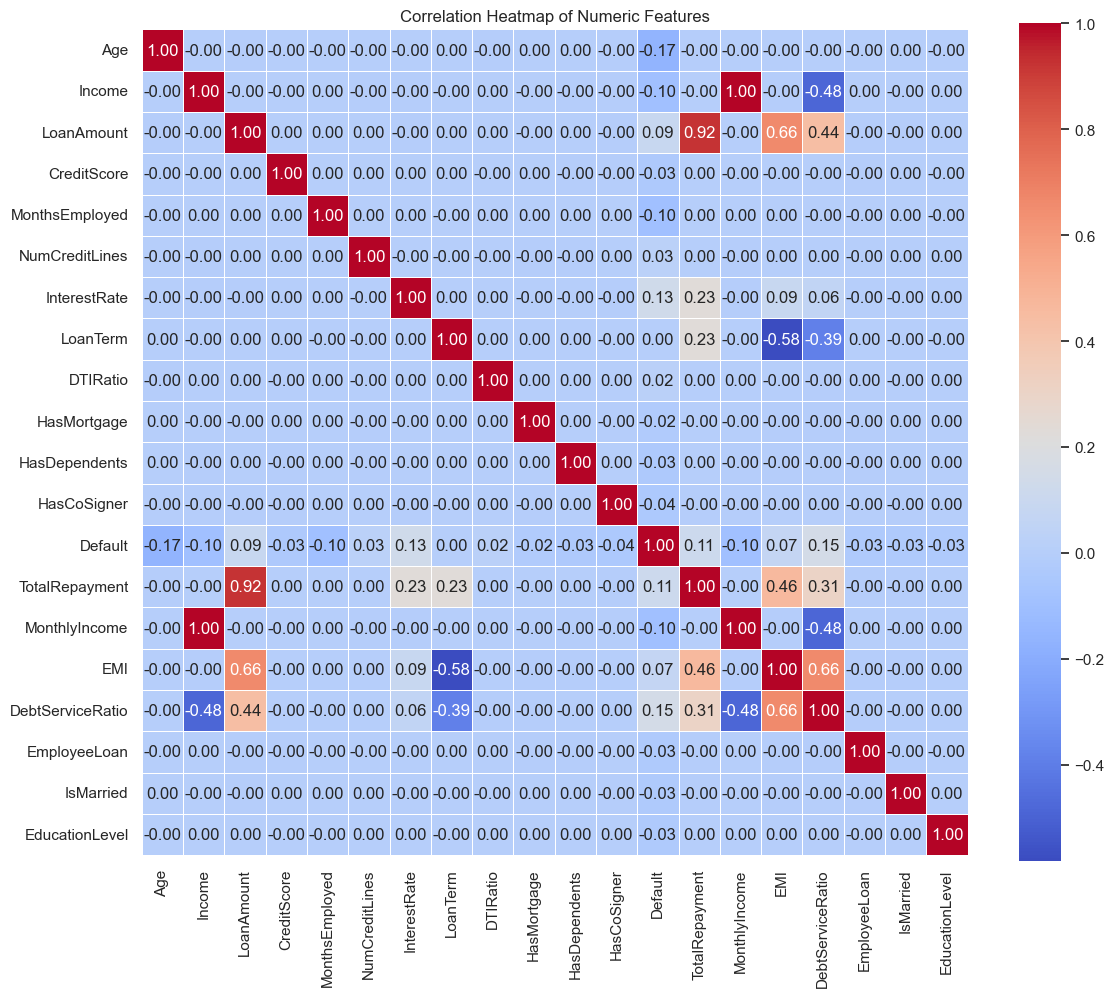

In [22]:
# we may have engineered some multi-colinear features, let us see. we will drop some to avoid multicolinearity

numeric_df = df2.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [25]:
df2.drop(['Income', 'LoanAmount', 'LoanTerm', 'EMI'], axis=1, inplace=True)


In [26]:
#drop the engineered categorical columns

df2.drop(['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus'], axis=1, inplace=True)


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   CreditScore       255347 non-null  int64  
 2   MonthsEmployed    255347 non-null  int64  
 3   NumCreditLines    255347 non-null  int64  
 4   InterestRate      255347 non-null  float64
 5   DTIRatio          255347 non-null  float64
 6   HasMortgage       255347 non-null  int64  
 7   HasDependents     255347 non-null  int64  
 8   HasCoSigner       255347 non-null  int64  
 9   Default           255347 non-null  int64  
 10  TotalRepayment    255347 non-null  float64
 11  DebtServiceRatio  255347 non-null  float64
 12  EmployeeLoan      255347 non-null  int64  
 13  IsMarried         255347 non-null  int64  
 14  EducationLevel    255347 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 29.2 MB


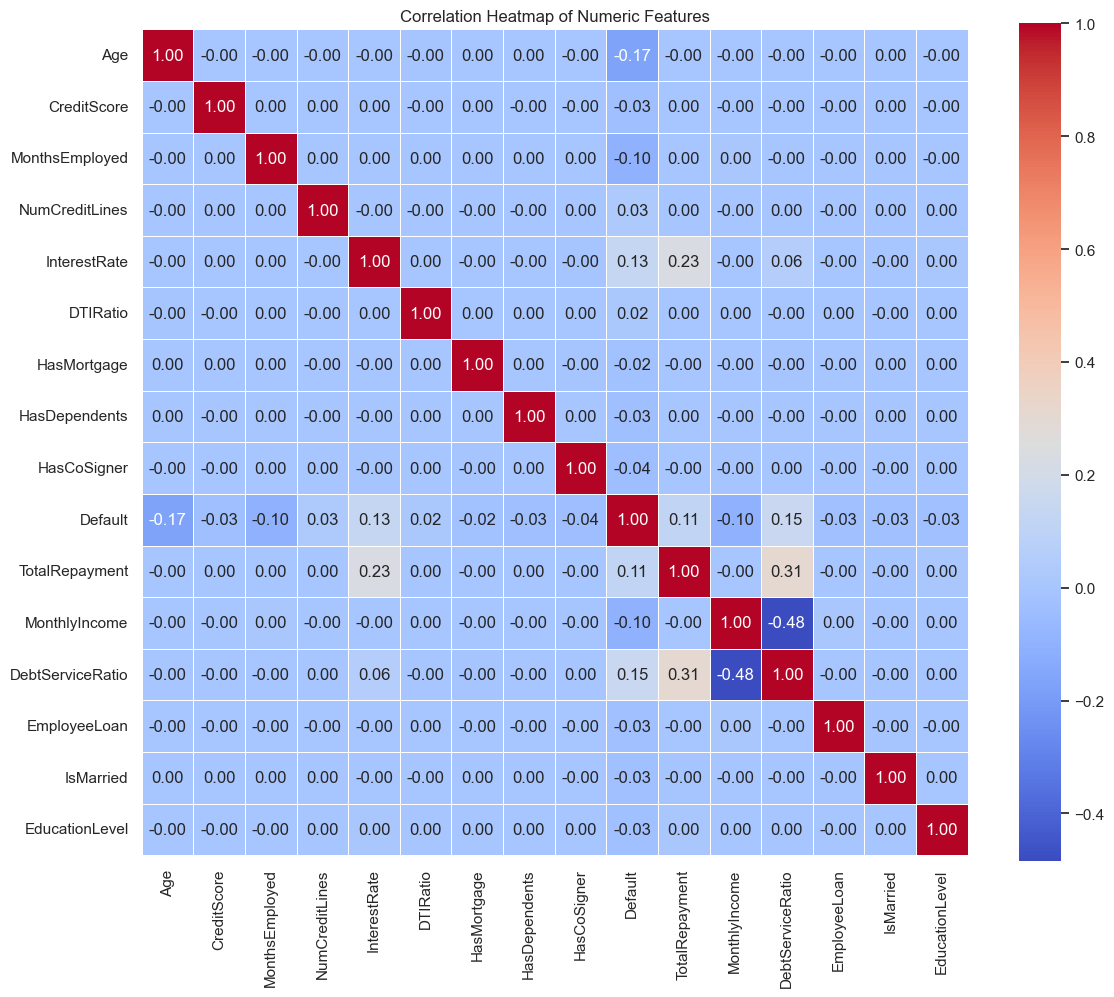

In [80]:
#another heatmap

numeric_df = df2.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [23]:
#drop monthly income andloan id
df2.drop(['MonthlyIncome', 'LoanID'], axis=1, inplace=True)




In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   CreditScore       255347 non-null  int64  
 2   MonthsEmployed    255347 non-null  int64  
 3   NumCreditLines    255347 non-null  int64  
 4   InterestRate      255347 non-null  float64
 5   DTIRatio          255347 non-null  float64
 6   HasMortgage       255347 non-null  int64  
 7   HasDependents     255347 non-null  int64  
 8   HasCoSigner       255347 non-null  int64  
 9   Default           255347 non-null  int64  
 10  TotalRepayment    255347 non-null  float64
 11  DebtServiceRatio  255347 non-null  float64
 12  EmployeeLoan      255347 non-null  int64  
 13  IsMarried         255347 non-null  int64  
 14  EducationLevel    255347 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 29.2 MB


In [29]:
# Handling class imbalance

df2['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

we will drop downsample to train decision tree and random forest faster

In [30]:
from sklearn.utils import resample

# Split majority and minority
df_majority = df2[df2['Default'] == 0]
df_minority = df2[df2['Default'] == 1]

# Downsample majority
df_majority_downsampled = resample(
    df_majority,
    replace=False,              
    n_samples=len(df_minority),    
    random_state=42
)

# Combine and shuffle
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [31]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59306 entries, 0 to 59305
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               59306 non-null  int64  
 1   CreditScore       59306 non-null  int64  
 2   MonthsEmployed    59306 non-null  int64  
 3   NumCreditLines    59306 non-null  int64  
 4   InterestRate      59306 non-null  float64
 5   DTIRatio          59306 non-null  float64
 6   HasMortgage       59306 non-null  int64  
 7   HasDependents     59306 non-null  int64  
 8   HasCoSigner       59306 non-null  int64  
 9   Default           59306 non-null  int64  
 10  TotalRepayment    59306 non-null  float64
 11  DebtServiceRatio  59306 non-null  float64
 12  EmployeeLoan      59306 non-null  int64  
 13  IsMarried         59306 non-null  int64  
 14  EducationLevel    59306 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 6.8 MB


In [32]:
df_downsampled['Default'].value_counts()

Default
0    29653
1    29653
Name: count, dtype: int64

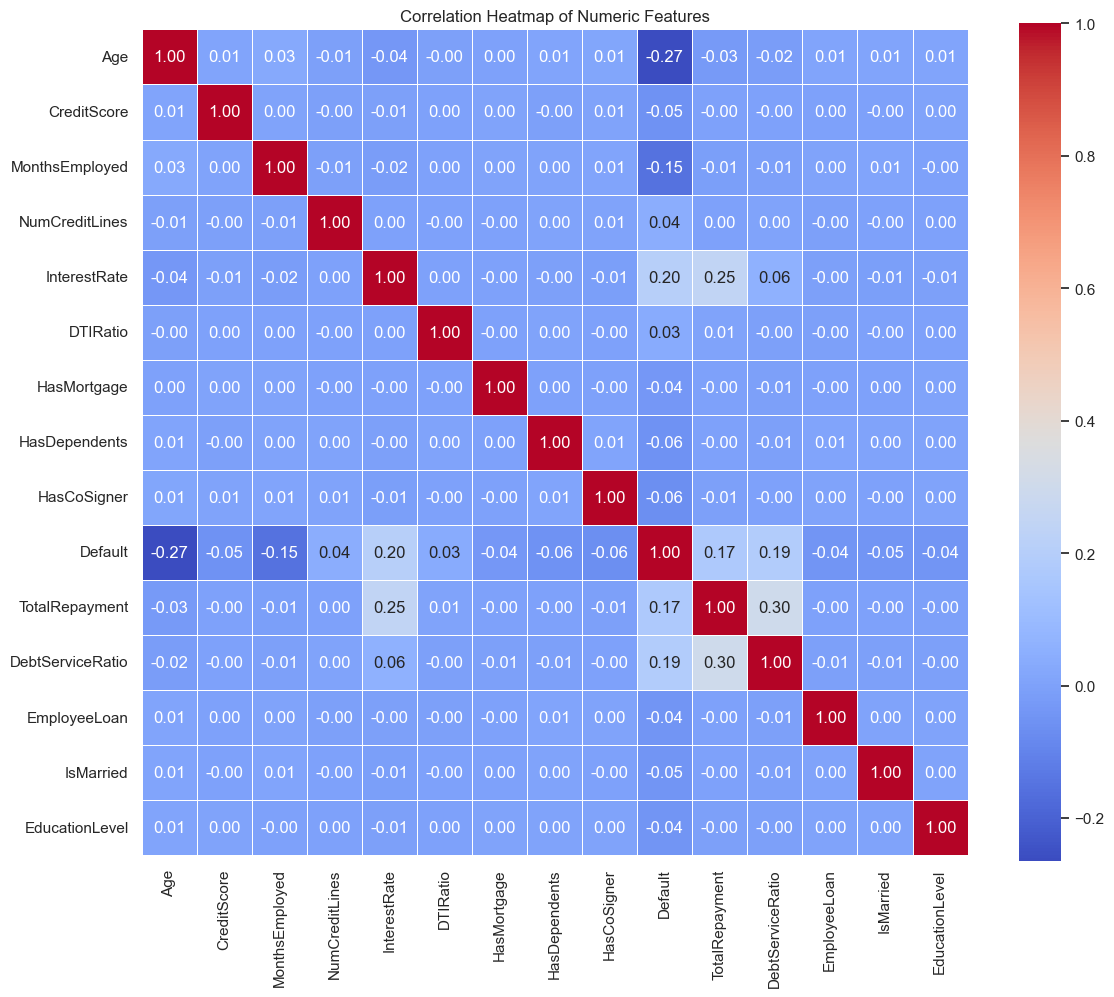

In [87]:
numeric_df = df_downsampled.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

## TREE BASED MODEL

# DECISION TREE

In [60]:
df_downsampled.head()

,Age,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default,TotalRepayment,DebtServiceRatio,EmployeeLoan,IsMarried,EducationLevel
0,24,356,59,2,10.80,0.81,1,0,1,0,258887.8600,0.72,1,0,2
1,50,383,7,4,19.72,0.71,1,1,1,1,35391.6264,0.27,0,0,2
2,37,598,99,3,13.50,0.27,0,0,1,0,321454.1650,1.17,0,1,1
3,25,578,0,1,23.55,0.50,0,1,1,1,129863.9225,0.26,0,0,1
4,18,394,79,1,16.69,0.31,1,1,1,0,305679.4180,0.65,0,0,2


In [61]:
#Split the data

y = df_downsampled['Default']


X = df_downsampled.drop('Default',axis=1)

print(y)

print(X)

0        0
1        1
2        0
3        1
4        0
        ..
59301    1
59302    1
59303    0
59304    0
59305    1
Name: Default, Length: 59306, dtype: int64
       Age  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  \
0       24          356              59               2         10.80   
1       50          383               7               4         19.72   
2       37          598              99               3         13.50   
3       25          578               0               1         23.55   
4       18          394              79               1         16.69   
...    ...          ...             ...             ...           ...   
59301   20          592              61               3         22.20   
59302   36          609              44               2         16.86   
59303   46          458              61               2         11.16   
59304   59          809              46               1          2.99   
59305   21          783          

In [62]:
#split dataset into training and testing datasetsa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier


# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [2, 5, 1],
    'min_samples_split': [2, 4, 6]
}

# Scoring dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# GridSearchCV with multiple scoring metrics
tree1 = GridSearchCV(
    estimator=tree,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',  # This tells it which metric to use for best_model_
    return_train_score=True
)

In [64]:
%%time
tree1.fit(X_train,y_train)

CPU times: total: 1min 27s
Wall time: 1min 33s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [65]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [66]:
tree1.best_score_

0.675224820143885

In [67]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [68]:
tree1_results_cv = make_results('decision tree cv',tree1,'auc')
tree1_results_cv

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.664034,0.645009,0.654146,0.659098,0.716045


# Random Forest

In [69]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Define hyperparameter grid
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [200]
}

# Define scoring metrics as a dictionary
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearchCV
rf1 = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',  
    return_train_score=True,
    n_jobs=-1  
)

In [70]:
%%time
rf1.fit(X_train, y_train) 

CPU times: total: 50.4 s
Wall time: 1h 5min 20s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200]},
             refit='recall', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [71]:
import pickle
import os

# Windows path
path = r'C:\Users\HP\Downloads'

def write_pickle(path, model_object, save_as: str):
    '''
    Save a model as a pickle file.

    Args:
        path:         folder path where you want to save the pickle
        model_object: model to pickle
        save_as:      filename (without extension)
    '''
    full_path = os.path.join(path, save_as + '.pickle')
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name: str):
    '''
    Load a pickled model.

    Args:
        path:             folder path where the model is saved
        saved_model_name: filename (without extension)

    Returns:
        model: the unpickled model
    '''
    full_path = os.path.join(path, saved_model_name + '.pickle')
    with open(full_path, 'rb') as to_read:
        model = pickle.load(to_read)

    return model

# Save the model
write_pickle(path, rf1, 'loan_rf1')

# Load the model
rf1 = read_pickle(path, 'loan_rf1')


In [72]:
rf1.best_score_

0.6837679856115109

In [73]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
rf1_results_cv = make_results('random forest cv', rf1, 'auc')
print(tree1_results_cv)
print(rf1_results_cv)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.664034  0.645009  0.654146  0.659098  0.716045
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.668082  0.673381  0.670675  0.669372  0.730568


In [79]:
# Get scores on test data

preds = rf1.best_estimator_.predict(X_test)

In [80]:
from sklearn.metrics import roc_auc_score


def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    auc = roc_auc_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'auc': [auc]
                        })

    return table

In [81]:

results = pd.DataFrame()

rf_test_scores = get_test_scores('RF test', preds, y_test)

results = pd.concat([rf1_results_cv, rf_test_scores], axis=0).reset_index(drop=True)

results


,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.668082,0.673381,0.670675,0.669372,0.730568
1,RF test,0.662530,0.676919,0.669647,0.666082,0.666083


# XGBoost

In [49]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 441.3 kB/s eta 0:05:39
   ---------------------------------------- 0.5/150.0 MB 441.3 kB/s eta 0:05:39
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   --------------------------------------

In [86]:
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

#  Define hyperparameters to tune (wrapped in lists)
cv_params = {
    'max_depth': [5],
    'n_estimators': [200],
    'learning_rate': [0.1],  # optional but useful for tuning
    # 'max_features' and 'max_samples' are not valid for XGBClassifier
    # Instead, use 'colsample_bytree' and 'subsample'
    'colsample_bytree': [1.0],
    'subsample': [0.7],
    'min_child_weight': [1]  # equivalent to min_samples_leaf/min_samples_split
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Instantiate GridSearchCV
xgb1 = GridSearchCV(
    estimator=xgb,
    param_grid=cv_params,
    scoring=scoring,
    cv=4,
    refit='recall',  # it will refit using the best recall score
    return_train_score=True,
    n_jobs=-1
)


In [87]:
%%time

xgb1.fit(X_train,y_train)

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:18:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CPU times: total: 6.5 s
Wall time: 9.68 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'learning_rate': [0.1],
                         'max_depth': [5], 'min_child_weight': [1],
                         'n_estimators': [200], 'subsample': [0.7]},
             refit='recall', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [88]:
# Examine best score

xgb1.best_score_

0.6768435251798561

In [89]:
xgb1.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.7}

In [90]:
def make_results(model_name: str, model_object, metric: str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, accuracy, or roc_auc

    Returns a pandas df with the precision, recall, F1, accuracy, and roc_auc
    scores for the model with the best mean 'metric' score across all validation folds.
    '''

    # Map user-friendly names to cv_results_ keys
    metric_dict = {
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy',
        'roc_auc': 'mean_test_roc_auc'  # ✅ Added
    }

    # Convert cv_results_ to DataFrame
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Select row with best score for the chosen metric
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract individual metric values
    f1 = best_estimator_results['mean_test_f1']
    recall = best_estimator_results['mean_test_recall']
    precision = best_estimator_results['mean_test_precision']
    accuracy = best_estimator_results['mean_test_accuracy']
    auc = best_estimator_results.get('mean_test_roc_auc')  

    # Create result table
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
        'auc': [auc]
    })

    return table


In [91]:
# Call 'make_results()' on the GridSearch object

xgb1_cv_results = make_results('XGB CV',xgb1,'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

C:\Users\HP\AppData\Local\Temp\ipykernel_6224\102898900.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, xgb1_cv_results], axis=0)


,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.668082,0.673381,0.670675,0.669372,0.730568
1,RF test,0.662530,0.676919,0.669647,0.666082,0.666083
0,XGB CV,0.674308,0.676844,0.675552,0.674925,NaN


In [92]:
preds = xgb1.best_estimator_.predict(X_test)

In [93]:
xgb_test_scores = get_test_scores('XGB test', preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.668082,0.673381,0.670675,0.669372,0.730568
1,RF test,0.662530,0.676919,0.669647,0.666082,0.666083
0,XGB CV,0.674308,0.676844,0.675552,0.674925,NaN
0,XGB test,0.677695,0.674221,0.675953,0.676806,0.676806


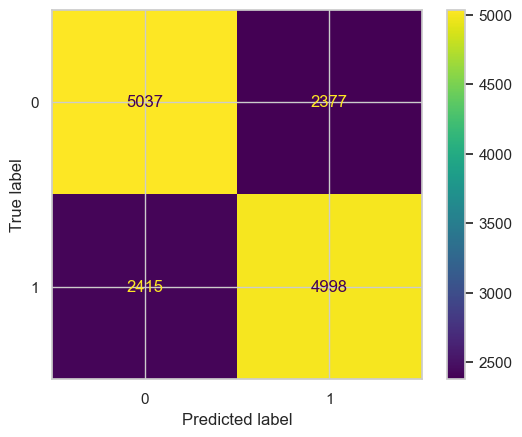

In [94]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot();

The XGBoost model performs **reasonably well**, with a balanced distribution of predictions. However, there is still a noticeable amount of misclassification (FP and FN), which suggests room for improvement. The recall is currently aat 67%, this means the model can only predict 67% of defaulters. This is a bit risky as the bank can not affort to lose 33% deposits to loan defaults.


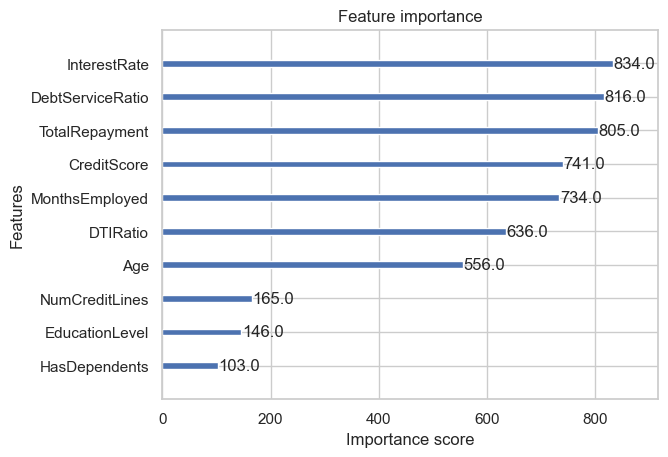

In [95]:
from xgboost import plot_importance


plot_importance(xgb1.best_estimator_, max_num_features=10);

The feature importance analysis reveals that InterestRate, DebtServiceRatio, and TotalRepayment are the top predictors of loan default, indicating that loan terms and repayment burden are the most influential risk factors. Financial indicators like CreditScore, MonthsEmployed, and DTIRatio also play a significant role, emphasizing the importance of creditworthiness and income stability. In contrast, demographic features such as Age, EducationLevel, and HasDependents contribute less to the model, suggesting that loan structure and financial variables are more predictive of default than personal characteristics. This insight can help prioritize features for modeling and inform lending risk strategies.

## NEURAL NETWORK

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   CreditScore       255347 non-null  int64  
 2   MonthsEmployed    255347 non-null  int64  
 3   NumCreditLines    255347 non-null  int64  
 4   InterestRate      255347 non-null  float64
 5   DTIRatio          255347 non-null  float64
 6   HasMortgage       255347 non-null  int64  
 7   HasDependents     255347 non-null  int64  
 8   HasCoSigner       255347 non-null  int64  
 9   Default           255347 non-null  int64  
 10  TotalRepayment    255347 non-null  float64
 11  DebtServiceRatio  255347 non-null  float64
 12  EmployeeLoan      255347 non-null  int64  
 13  IsMarried         255347 non-null  int64  
 14  EducationLevel    255347 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 29.2 MB


In [97]:
df2['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

Neural networks learn beetter with a large dataset so we are going to upsample. Downsampling may also lead to loss of some relevant data that may add the model training.

In [98]:
# Split majority and minority
df_majority = df2[df2['Default'] == 0]
df_minority = df2[df2['Default'] == 1]

# Upsample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,                          
    n_samples=len(df_majority),            
    random_state=42
)

# Combine and shuffle
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [99]:
df_upsampled['Default'].value_counts()

Default
1    225694
0    225694
Name: count, dtype: int64

In [100]:
#Split the data

y = df_upsampled['Default']


X = df_upsampled.drop('Default',axis=1)

print(y)

print(X)

0         1
1         1
2         0
3         0
4         0
         ..
451383    1
451384    1
451385    0
451386    0
451387    0
Name: Default, Length: 451388, dtype: int64
        Age  CreditScore  MonthsEmployed  NumCreditLines  InterestRate  \
0        29          399              29               4         16.95   
1        21          409              26               1         18.65   
2        41          640             100               3         10.32   
3        44          849             111               3         11.70   
4        31          500              23               3         16.52   
...     ...          ...             ...             ...           ...   
451383   20          315              27               3          2.13   
451384   19          595              47               1         15.73   
451385   64          546              53               2          5.73   
451386   27          743             104               1         24.53   
451387   3

In [101]:
#split the data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [102]:
#use standard scaler to scale the dataset

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [127]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


# Define input dimension (number of features)
input_dim = df_upsampled.drop('Default', axis=1).shape[1]

# Build the model
model = Sequential([
    Input(shape=(input_dim,)), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

In [128]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [129]:
# Fit model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 75s 8ms/step - accuracy: 0.6792 - loss: 0.5978 - val_accuracy: 0.6829 - val_loss: 0.5970
Epoch 2/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.6841 - loss: 0.5915 - val_accuracy: 0.6861 - val_loss: 0.5902
Epoch 3/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.6879 - loss: 0.5889 - val_accuracy: 0.6872 - val_loss: 0.5885
Epoch 4/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.6952 - loss: 0.5827 - val_accuracy: 0.6905 - val_loss: 0.5868
Epoch 5/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - accuracy: 0.6972 - loss: 0.5793 - val_accuracy: 0.6940 - val_loss: 0.5828
Epoch 6/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 0.7024 - loss: 0.5719 - val_accuracy: 0.6968 - val_loss: 0.5774
Epoch 7/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - accuracy: 0.7082 - loss: 0.5659 - val_accuracy: 0.7014 - val_loss: 0.5748
Epoch 8/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.7121 - loss: 0

In [106]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.7783
Final Validation Accuracy: 0.7454


In [107]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


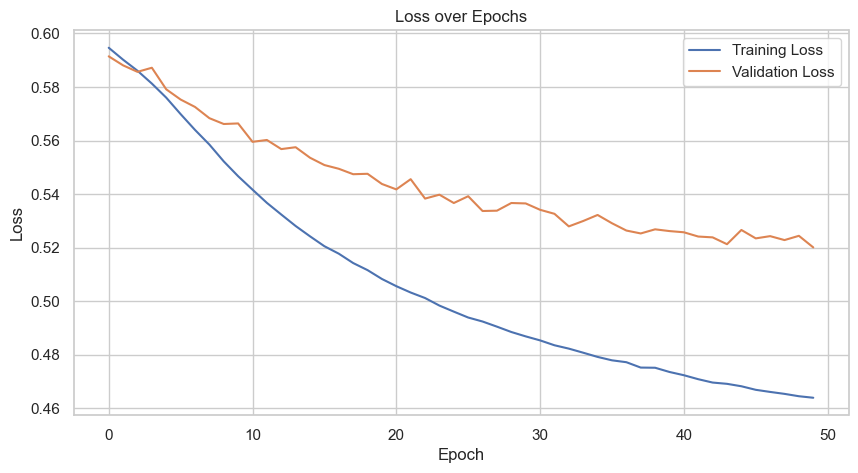

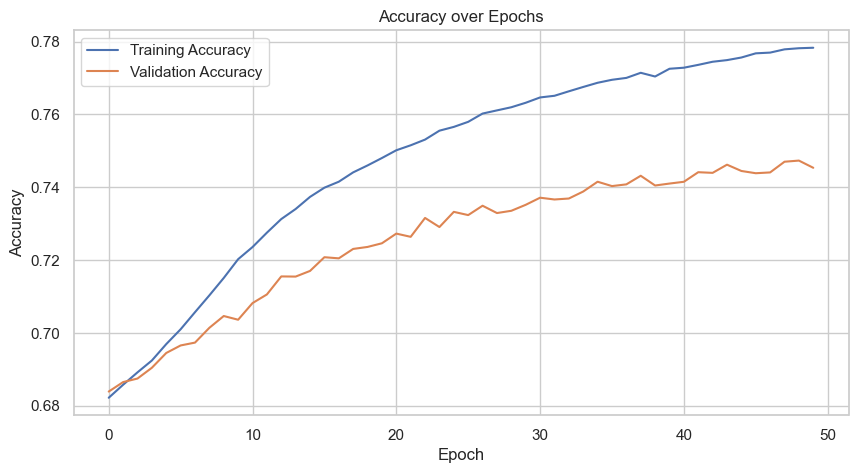

In [108]:
plot_loss(history)
plot_accuracy(history)


In [109]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")
print(f"✅ Test Loss: {loss:.4f}")



✅ Test Accuracy: 0.7460
✅ Test Loss: 0.5221


In [110]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

3527/3527 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.68      0.73     56424
           1       0.72      0.81      0.76     56423

    accuracy                           0.75    112847
   macro avg       0.75      0.75      0.74    112847
weighted avg       0.75      0.75      0.74    112847



The model shows slightly better recall for defaulters (class 1) at 0.81, meaning it correctly identifies 81% of all actual defaulters, which is crucial in credit risk modeling. However, its precision for defaulters is lower at 0.72, indicating that about 28% of predicted defaulters are false positives. For non-defaulters (class 0), the model has higher precision (0.78) but slightly lower recall (0.68), suggesting it is more conservative in predicting non-defaulters but sometimes misses them.  Overall, the model prioritizes minimizing false negatives for defaulters, making it suitable for financial scenarios where catching true defaulters is more critical than occasionally misclassifying safe borrowers.

This is a good starting point but we have to try with other parameters too

In [114]:
#Using regularizers to train the second neural network

from keras import regularizers

In [115]:


# Define input dimension (number of features)
input_dim = df_upsampled.drop('Default', axis=1).shape[1]

# Build the model
model = Sequential([
    Input(shape=(input_dim,)), 
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

In [116]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [118]:
# Fit model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.6770 - loss: 0.6149 - val_accuracy: 0.6809 - val_loss: 0.6083
Epoch 2/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.6787 - loss: 0.6094 - val_accuracy: 0.6779 - val_loss: 0.6093
Epoch 3/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.6780 - loss: 0.6088 - val_accuracy: 0.6810 - val_loss: 0.6046
Epoch 4/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.6786 - loss: 0.6060 - val_accuracy: 0.6792 - val_loss: 0.6051
Epoch 5/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.6802 - loss: 0.6054 - val_accuracy: 0.6799 - val_loss: 0.6042
Epoch 6/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6781 - loss: 0.6060 - val_accuracy: 0.6805 - val_loss: 0.6037
Epoch 7/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.6792 - loss: 0.6045 - val_accuracy: 0.6799 - val_loss: 0.6042
Epoch 8/50
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.6768 - loss: 0

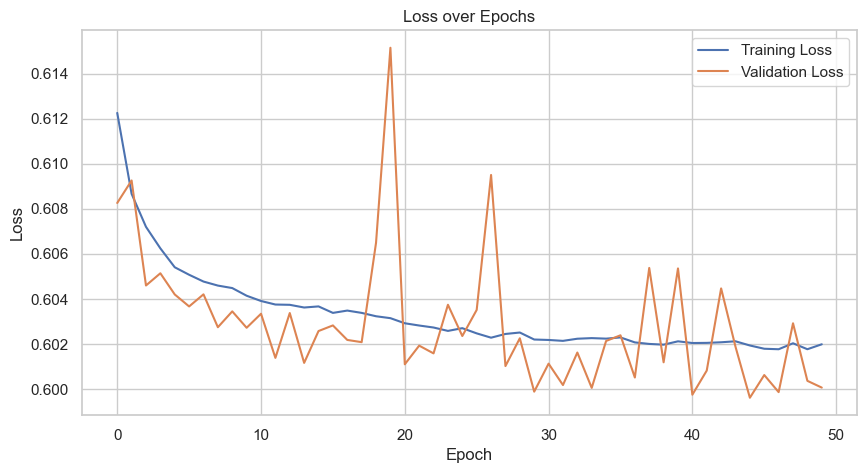

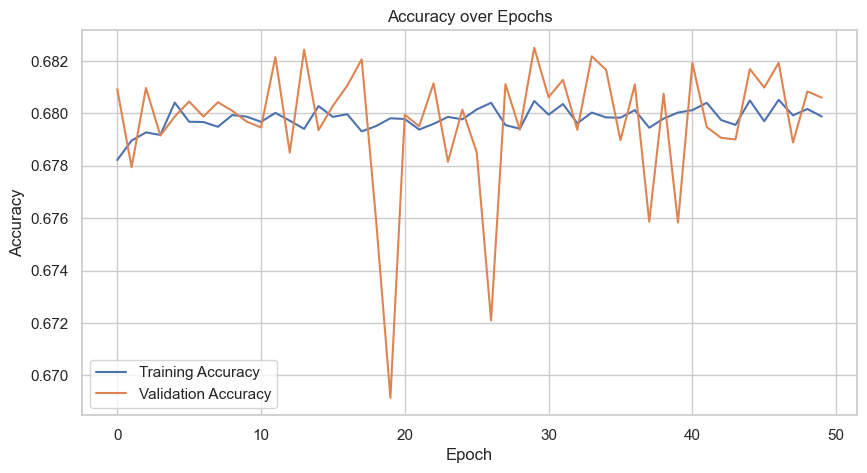

In [119]:
plot_loss(history)
plot_accuracy(history)


In [120]:
y_pred_probs = model.predict(X_test_scaled)
y_pred_two = (y_pred_probs > 0.5).astype("int32")

print(classification_report(y_test, y_pred_two))

3527/3527 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       0.69      0.66      0.68     56424
           1       0.67      0.70      0.69     56423

    accuracy                           0.68    112847
   macro avg       0.68      0.68      0.68    112847
weighted avg       0.68      0.68      0.68    112847



This model, trained with L2 regularization, achieves an overall accuracy of 68%, with balanced precision and recall scores around 67–70% for both defaulters and non-defaulters. For class 0 (non-defaulters), precision is slightly higher (0.69), while class 1 (defaulters) shows better recall (0.70), indicating that the model is somewhat better at identifying defaulters but still prone to false positives. The inclusion of L2 regularization likely helped prevent overfitting, but the model shows signs of underfitting.

In [ ]:
#Building a third nural network, this time with more epochs and an addition of another layer to the neural network

In [49]:
# Define input dimension (number of features)
input_dim = df_upsampled.drop('Default', axis=1).shape[1]

# Build the model
model = Sequential([
    Input(shape=(input_dim,)), 
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

In [50]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [51]:
# Fit model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 0.6799 - loss: 0.5986 - val_accuracy: 0.6843 - val_loss: 0.5971
Epoch 2/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.6837 - loss: 0.5931 - val_accuracy: 0.6856 - val_loss: 0.5916
Epoch 3/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.6891 - loss: 0.5866 - val_accuracy: 0.6888 - val_loss: 0.5861
Epoch 4/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.6953 - loss: 0.5802 - val_accuracy: 0.6913 - val_loss: 0.5811
Epoch 5/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.7014 - loss: 0.5726 - val_accuracy: 0.6990 - val_loss: 0.5741
Epoch 6/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step - accuracy: 0.7110 - loss: 0.5608 - val_accuracy: 0.7049 - val_loss: 0.5662
Epoch 7/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.7188 - loss: 0.5488 - val_accuracy: 0.7118 - val_loss: 0.5609
Epoch 8/100
8464/8464 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - accuracy: 0.7295 -

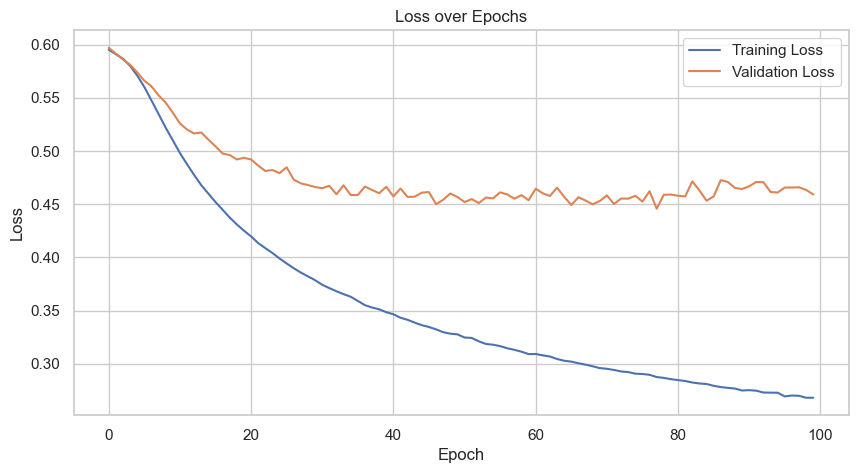

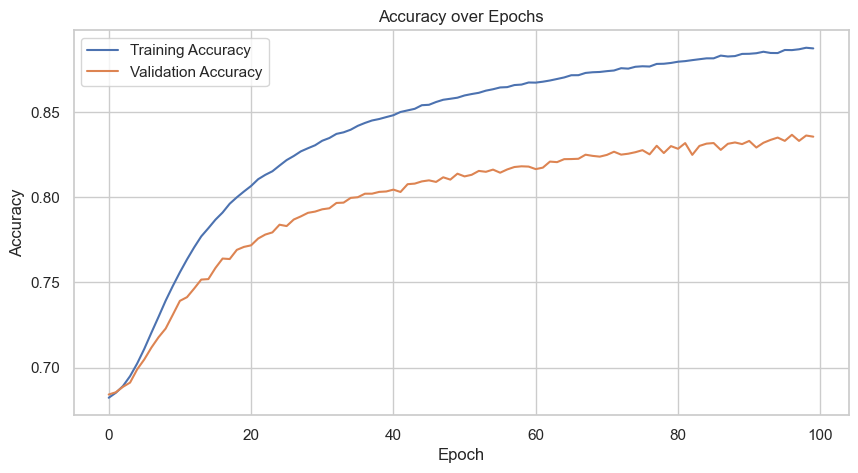

In [52]:
plot_loss(history)
plot_accuracy(history)


In [53]:
y_pred_probs = model.predict(X_test_scaled)
y_pred_three = (y_pred_probs > 0.5).astype("int32")

print(classification_report(y_test, y_pred_three))

3527/3527 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     56424
           1       0.78      0.93      0.85     56423

    accuracy                           0.84    112847
   macro avg       0.85      0.84      0.83    112847
weighted avg       0.85      0.84      0.83    112847



This model shows a significant improvement, achieving an overall accuracy of 84%. For class 0 (non-defaulters), the model has high precision (0.91) but slightly lower recall (0.74), indicating it is very good at predicting non-defaulters correctly when it says so, but misses some actual non-defaulters. For class 1 (defaulters), the model achieves a recall of 0.93, meaning it identifies the majority of defaulters correctly, though precision is slightly lower at 0.78, suggesting a few false positives

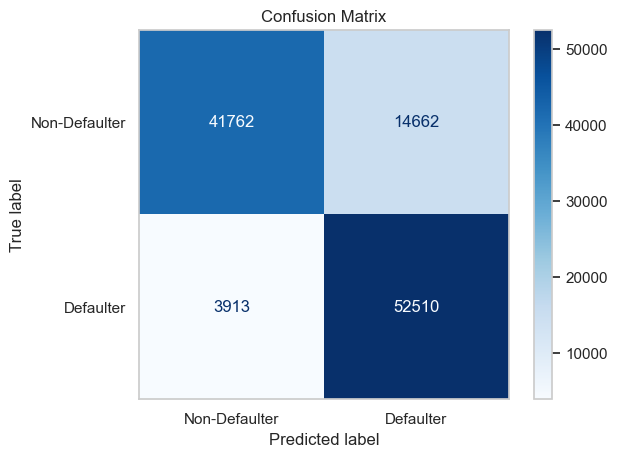

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_three)

# Step 2: Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Defaulter", "Defaulter"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


## Enhanced Confusion Matrix Analysis – Loan Default Prediction

- The model shows **strong predictive ability**, with significantly more true positives and true negatives than misclassifications.
- **False negatives** are relatively low, which is favorable when identifying risky loan applicants.


In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dictionary to store results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Function to evaluate and append metrics
def evaluate_model(name, y_true, y_pred):
    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_true, y_pred))
    results["Precision"].append(precision_score(y_true, y_pred))
    results["Recall"].append(recall_score(y_true, y_pred))
    results["F1 Score"].append(f1_score(y_true, y_pred))

# Evaluate all predictions
evaluate_model("y_pred", y_test, y_pred)
evaluate_model("y_pred_two", y_test, y_pred_two)
evaluate_model("y_pred_three", y_test, y_pred_three)

# Create DataFrame
comparison_df = pd.DataFrame(results)
print(comparison_df)


          Model  Accuracy  Precision    Recall  F1 Score
0        y_pred  0.746010   0.716588  0.813923  0.762161
1    y_pred_two  0.680213   0.674654  0.696117  0.685217
2  y_pred_three  0.835397   0.781725  0.930649  0.849711


We are employing a risk-averse credit strategy, so we are favouring recall as the most important metric for evaluating our model. With this in mind, the third model significantly performs better than the other two.

In a risk-averse credit strategy, the priority is to minimize potential losses rather than maximize short-term gains. This makes recall the most important metric, as it focuses on identifying as many actual defaulters as possible. The model y_pred_three, with the highest recall of 0.93, is best aligned with this objective. 

From a business standpoint, it's preferable to reject a few potentially good borrowers (and earn zero spread on some deposits) than to mistakenly approve defaulters and suffer capital losses. Earning no return is a safer and more sustainable outcome than risking the loss of principal, which can erode profitability and threaten portfolio stability. Therefore, choosing a high-recall model supports prudent lending and long-term financial resilience.